# Pencil Sketch

[http://www.askaswiss.com/2016/01/how-to-create-pencil-sketch-opencv-python.html](http://www.askaswiss.com/2016/01/how-to-create-pencil-sketch-opencv-python.html)

Using OpenCV and Python, an RGB color image can be converted into a pencil sketch in four simple steps:

-     Convert the RGB color image to grayscale.
-    Invert the grayscale image to get a negative.
-     Apply a Gaussian blur to the negative from step 2.
-     Blend the grayscale image from step 1 with the blurred negative from step 3 using a color dodge.

## Load the picture that will be sketched

In [1]:
(ns opencv4.cartoon2
 (:require
  [opencv4.core :refer :all]
  [opencv4.utils :as u]))

nil

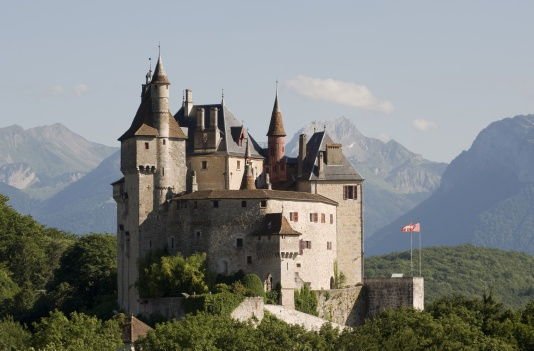

In [2]:
(def img
  (-> "resources/chapter03/montrottier.jpg"
  (imread IMREAD_REDUCED_COLOR_4)))
(u/>>> img)

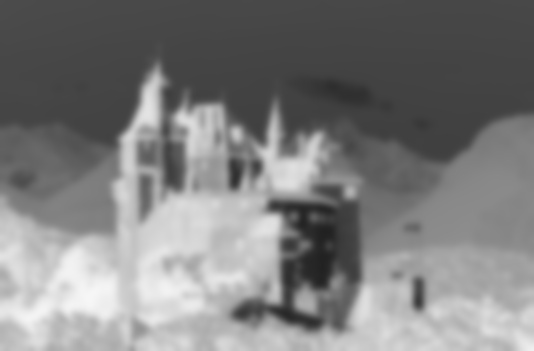

In [3]:
(def gray (-> img clone (cvt-color! COLOR_BGR2GRAY)))
; (u/>>> gray)

;(def inverted
;  (-> gray clone (bitwise-not!)))
;(u/>>> inverted)

(def gaussed
  (-> gray
      clone
      bitwise-not! 
      (gaussian-blur! (new-size 21 21) 0.0 0.0)))

(u/>>> gaussed)

In [4]:
(def a (u/matrix-to-mat [[0 1 2]]))
(def b (u/matrix-to-mat [[2 2 2]]))
(def c (new-mat))
(divide a b c 256.0)
(dump c)

[0 128 256]


nil

In [5]:
(defn dodge! [img_ mask]
  (let [ output (clone img_) ]
  (divide img_ (bitwise-not! (-> mask clone)) output 256.0)
  output))

#'opencv4.cartoon2/dodge!

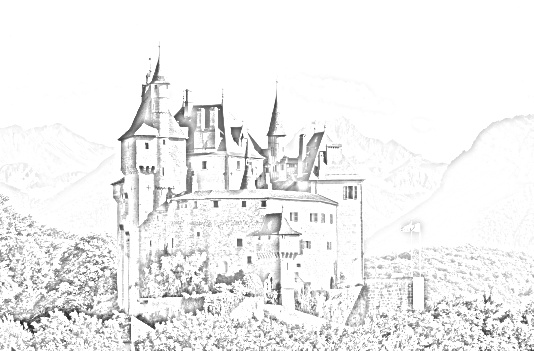

In [10]:
(u/>>> (dodge-v2! gray gaussed))

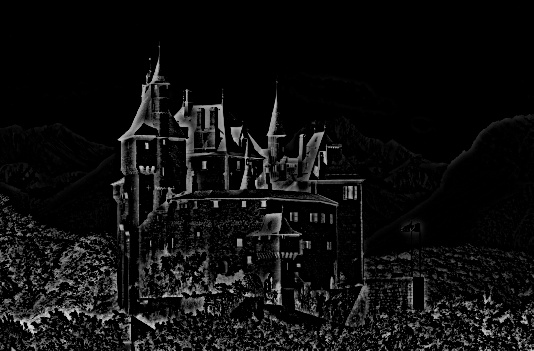

In [17]:
(defn burn-v2! [ image mask]
  (bitwise-not! (dodge-v2! image mask)))
(u/>>> (burn-v2! gray gaussed))

## Apply a Canvas effect

Now that the main picture has been turned to a crayon styled art form, it would be nice to lay this out on a canvas looking mat.

This is done using the **multiply** function from OpenCV core.

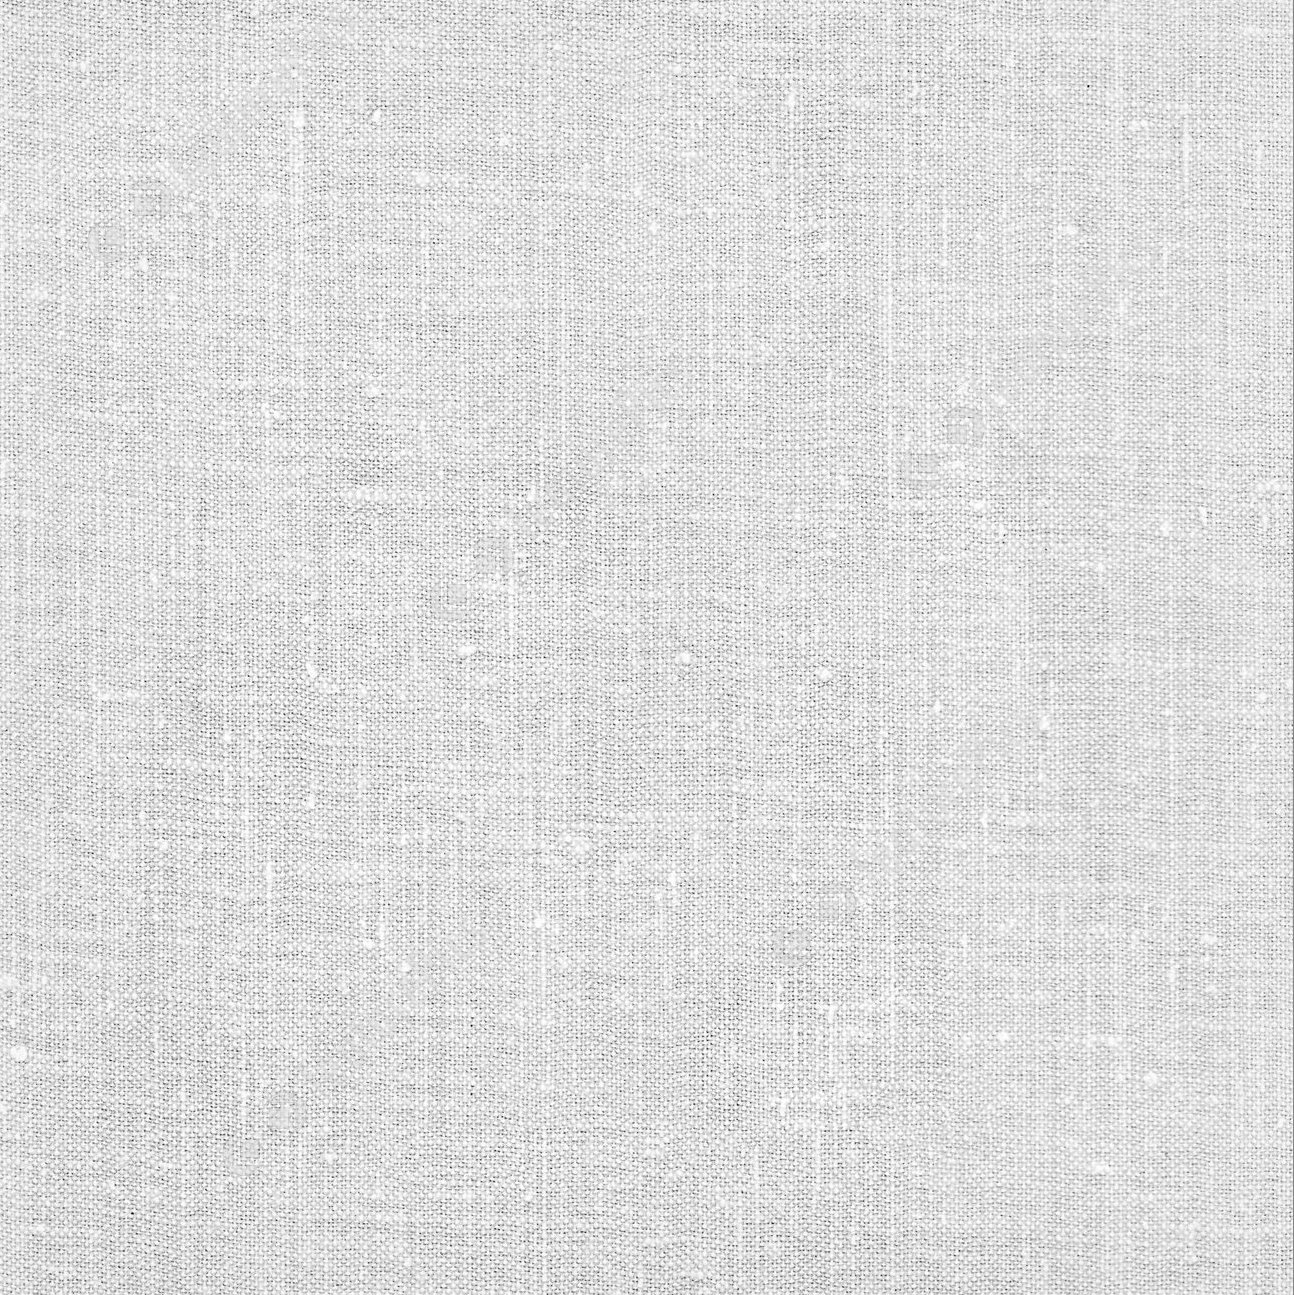

In [18]:
(def canvas (imread "resources/canvas.jpg" 0))
(resize! canvas (new-size (.cols gray) (.rows gray)))
(u/>>> canvas)